# Examen statistiques E2I4

 - HUARD Titouan

On importe les librairies utiles pour la suite.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

from scipy.stats.stats import ttest_1samp , ttest_ind

# Exercice 1

On commence par importer les données du tableur

In [136]:
ech = pd.read_excel("DureeVie_Piles.xlsx",header=0, engine="openpyxl")


## 1/ Décrire les données

grâce au code suivant je calcule la taille de l'echantillon, sa la valeur moyenne ainsi que sa variance.

In [137]:
print("La taille de l'echantillon", len(ech.values))
print("La durée de vie moyenne obtenue avec cette echantillon est : ", np.mean(ech.values))
print("la variance de l'echantillon est : ", np.var(ech.values))

La taille de l'echantillon 100
La durée de vie moyenne obtenue avec cette echantillon est :  167.38388000000003
la variance de l'echantillon est :  104.43418166560001


L'echantillon a bien n = 100.
Sa valeur moyenne est de 167,38 ce qui est proche de la valeur annoncée.

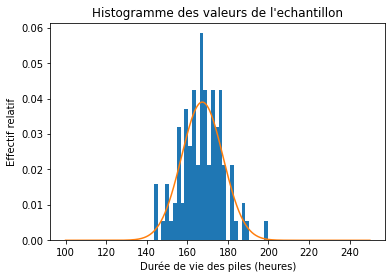

In [138]:
x=np.linspace(100,250,1000)
plt.figure()
plt.hist(ech,bins=30,density=1)
plt.plot(x,norm.pdf(x,np.mean(ech.values),np.std(ech.values)))
plt.title("Histogramme des valeurs de l'echantillon")
plt.xlabel("Durée de vie des piles (heures)")
plt.ylabel("Effectif relatif")
plt.show()

Dans la figure précedente, on observe que que la distribution de cette echantillon semble suivre
une loi normale.

## 2/ Estimation ponctuelle de la durée de vie moyenne

L'echantillon est prélevé au hasard et contient 100 valeurs. On peut donc utiliser cette
échantillon comme estimation ponctuelle.

In [139]:
xbarre = np.mean(ech.values)
s2 = np.var(ech.values, ddof = 1)

print("xbarre = ", xbarre)
print("s² = ", s2)

xbarre =  167.38388000000003
s² =  105.48907238949496


On peut donc utiliser ces valeurs pour calculer l'intervalle de confiance à 98%

In [140]:
def Intervalle_confiance_moyenne(ech,seuil,xbarre, variance):
    ##seuil en %
        #taille n de l'echantillon
    n=len(ech)
        #calcul de zalpha2
    val=seuil/100+(1-seuil/100)/2
    zalpha2=norm.ppf(val)
        #calcul des bornes de l'intervales
    marge=2*zalpha2*sqrt(variance)/(sqrt(n))
    print("Marge d'erreur de l'intervalle de confiance :",marge)

    return (xbarre-marge,xbarre+marge)

print("intervalle de confiance moyenne population",Intervalle_confiance_moyenne(ech.values, 98, xbarre, s2))

Marge d'erreur de l'intervalle de confiance : 4.778684854232578
intervalle de confiance moyenne population (162.60519514576745, 172.1625648542326)


Avec un risque de 2%, on peut affirmer que la durée de vie des piles sera
dans l'intervalle de confiance calculé ci dessus.

## 3/ tester l'affirmation du fabriquant

Pour tester l'affirmation du fabriquant, l'organisme
de défence des consomateurs peur realiser un test
d'hypothèse afin de savoir si la variation observer
est significative ou non.

### Realisation du test

On vas donc poser 2 hypothèses :

- (H0) soit mu=170
- (H1) soit mu != 170 (hyphotese bilaterale)

On va aussi fixer le risque alpha = P(H0rejetée/H0vraie) = 5%
Soit H0 vraie, zthéorique=1,96 (en centrant et reduisant la loi suivant par Xbarre)

H0 rejeté si Xbarre* < -1,96 ou > 1,96
Ensuite on va comparer cette valeur théorique à la valeur de zobservé dans notre echantillon de mesures.

In [141]:
from scipy.stats import ttest_ind

print(ttest_1samp(ech.values, 170))

Ttest_1sampResult(statistic=array([-2.5471465]), pvalue=array([0.01240023]))


Zobs = -2,54 ce qui est inferieur à -1,96. L'hypothèse H0 est donc rejetée.

On peut affirmer avec un risque d'erreur à 5% que l'echantillon
a bien une durée de vien moyenne inferieur à la durée de vie affirmée
par le fabriquant.

# Exercice 2

On commence par importer les valeurs du tableur

In [142]:
ech = pd.read_excel("VaccinPlacebo.xlsx",header=0, index_col=0, engine="openpyxl")

## 1/ Description de l'echantillon

Les fonctions suivantes permettent de decrir l'echantillon.
Tout d'abord, nous avons le nombre de participants puis dans
un second temps, la repartition des participants dans les deux
groupes en fonction de leur genre.

In [143]:
print("Nombre de participants à l'essai clinique : ", len(ech.values))

Nombre de participants à l'essai clinique :  492


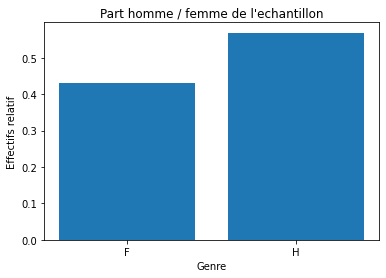

In [144]:
# histogramme repartition homme femme
(Valeurs,FreqAbsolues)=np.unique(ech.loc[:,'Genre'], return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.figure()
plt.bar([Valeurs[0], Valeurs[1]], FreqRelatives)
plt.xlabel('Genre')
plt.ylabel('Effectifs relatif')
plt.title("Part homme / femme de l'echantillon")
plt.show()

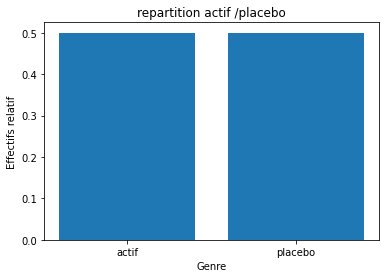

In [145]:
# histogramme repartition dans chacun des bras
(Valeurs,FreqAbsolues)=np.unique(ech.loc[:,'Traitement'], return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.figure()
plt.bar([Valeurs[0], Valeurs[1]], FreqRelatives)
plt.xlabel('Genre')
plt.ylabel('Effectifs relatif')
plt.title("repartition actif /placebo")
plt.show()

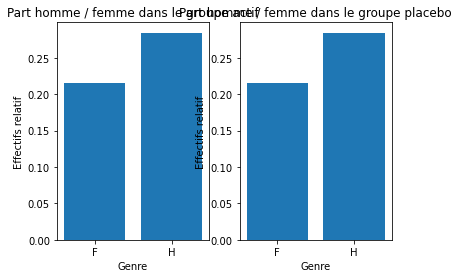

In [146]:
# histogramme repartition homme femme dans chaque groupe
actif = []
placebo = []

for v in ech.values :
    if v[0] == "actif":
        actif.append(v[1])
    else:
        placebo.append(v[1])

#actif
(Valeurs,FreqAbsolues)=np.unique(actif, return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.figure()

plt.subplot(1,2,1)
plt.bar([Valeurs[0], Valeurs[1]], FreqRelatives)
plt.xlabel('Genre')
plt.ylabel('Effectifs relatif')
plt.title("Part homme / femme dans le groupe actif")

#placebo
(Valeurs,FreqAbsolues)=np.unique(placebo, return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.subplot(1,2,2)
plt.bar([Valeurs[0], Valeurs[1]], FreqRelatives)
plt.xlabel('Genre')
plt.ylabel('Effectifs relatif')
plt.title("Part homme / femme dans le groupe placebo")

plt.show()

## 2/ proportion de participants qui ont déclaré la maladie

Dans un premier temps l'effectif relatif de malade en fonction du groupe :

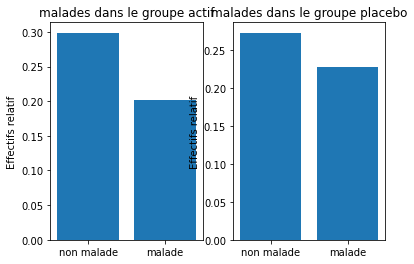

In [147]:
actif = []
placebo = []

for v in ech.values :
    if v[0] == "actif":
        actif.append(v[2])
    else:
        placebo.append(v[2])

#actif
(Valeurs,FreqAbsolues)=np.unique(actif, return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.figure()

plt.subplot(1,2,1)
plt.bar(["non malade", "malade"], FreqRelatives)
plt.ylabel('Effectifs relatif')
plt.title("malades dans le groupe actif")

#placebo
(Valeurs,FreqAbsolues)=np.unique(placebo, return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.subplot(1,2,2)
plt.bar(["non malade", "malade"], FreqRelatives)
plt.ylabel('Effectifs relatif')
plt.title("malades dans le groupe placebo")

plt.show()

Nombre de malade en fonction du genre :

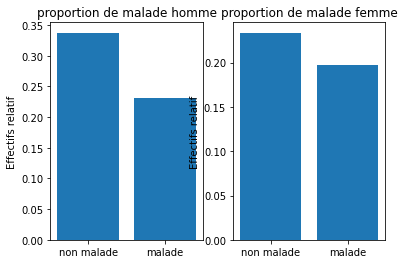

In [148]:
h = []
f = []

for v in ech.values :
    if v[1] == "H":
        h.append(v[2])
    else:
        f.append(v[2])
#homme
(Valeurs,FreqAbsolues)=np.unique(h, return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.figure()

plt.subplot(1,2,1)
plt.bar(["non malade", "malade"], FreqRelatives)
plt.ylabel('Effectifs relatif')
plt.title("proportion de malade homme")

#femme
(Valeurs,FreqAbsolues)=np.unique(f, return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.subplot(1,2,2)
plt.bar(["non malade", "malade"], FreqRelatives)
plt.ylabel('Effectifs relatif')
plt.title("proportion de malade femme")

plt.show()

## 3/ teste d'efficacité de la substance



# Exercice 3

On importe les données pour l'exercice

In [149]:
ech = pd.read_excel("ProgType.xlsx",header=0, engine="openpyxl")

## 1/ Histogrammes des mesurtes des programmes

Dans un premiers temps on peut comparer les temps d'executions en regardant la figure suivante.
Elle montre les histogrammes des temps d'execution des trois programmes.

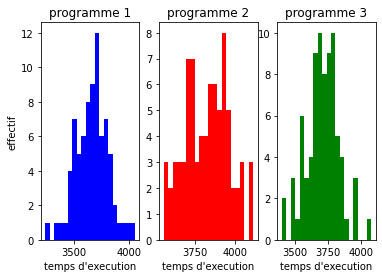

In [150]:
plt.figure()
plt.subplot(1,3,1)
plt.hist(ech.loc[:,'ProgType1'],bins=20,density=0, color='blue')
plt.xlabel("temps d'execution")
plt.ylabel("effectif")
plt.title("programme 1")
plt.subplot(1,3,2)
plt.hist(ech.loc[:,'ProgType2'],bins=20,density=0, color='red')
plt.xlabel("temps d'execution")
plt.title("programme 2")
plt.subplot(1,3,3)
plt.hist(ech.loc[:,'ProgType3'],bins=20,density=0, color='green')
plt.xlabel("temps d'execution")
plt.title("programme 3")
plt.show()

Les differentes moyennes ainsi que les variances des programmes
sont les suivantes.

In [151]:
P1 = ech.loc[:,'ProgType1']
P2 = ech.loc[:,'ProgType2']
P3 = ech.loc[:,'ProgType3']


print("programme 1 : ")
print("La taille de l'echantillon", len(P1))
print("Temps d'execution moyen : ", np.mean(P1))
print("variance : ", np.var(P1))

print("programme 2 : ")
print("La taille de l'echantillon", len(P2))
print("Temps d'execution moyen : ", np.mean(P2))
print("variance : ", np.var(P2))

print("programme 3 : ")
print("La taille de l'echantillon", len(P3))
print("Temps d'execution moyen : ", np.mean(P3))
print("variance : ", np.var(P3))

programme 1 : 
La taille de l'echantillon 79
Temps d'execution moyen :  3662.673011392406
variance :  21511.769711233246
programme 2 : 
La taille de l'echantillon 79
Temps d'execution moyen :  3825.9056340379743
variance :  18785.577703442923
programme 3 : 
La taille de l'echantillon 79
Temps d'execution moyen :  3706.574644518988
variance :  14971.204256216577


## 2/ test sur le temps d'execution

Dans un premier temps, nous pouvont effectuer un test avec les intervalle de confiance afin de voir quel programme est le plus rapide.

In [152]:
print("intervalle de confiance moyenne programme 1 :",Intervalle_confiance_moyenne(P1, 95,
                                                            np.mean(P1),
                                                            np.var(P1)))
print("intervalle de confiance moyenne programme 2 :",Intervalle_confiance_moyenne(P2, 95,
                                                            np.mean(P2),
                                                            np.var(P2)))
print("intervalle de confiance moyenne programme 3 :",Intervalle_confiance_moyenne(P3, 95,
                                                            np.mean(P3),
                                                            np.var(P3)))


Marge d'erreur de l'intervalle de confiance : 64.68485531119914
intervalle de confiance moyenne programme 1 : (3597.988156081207, 3727.357866703605)
Marge d'erreur de l'intervalle de confiance : 60.447287705262845
intervalle de confiance moyenne programme 2 : (3765.4583463327117, 3886.352921743237)
Marge d'erreur de l'intervalle de confiance : 53.962605264286445
intervalle de confiance moyenne programme 3 : (3652.6120392547014, 3760.5372497832745)


Grace aux calcules ci dessus, on peut dire que en moyenne, le programme 1 est le plus rapide suivi du programme 3
puis du programme 2.

## 3/ tests de comparaison des moyennes

On a alpha = 5%

### test entre les programme 1 et 2
les hypotheses pour le programme 1 et 2 sont les suivantes
- (H0) soit mu1=mu2
- (H1) soit mu1 != mu2

In [153]:
alpha = 5
z_obs = ttest_ind(P1, P2, equal_var=False)
z_alpha = norm.ppf((95 + 1) /2)

if(z_obs.pvalue < alpha): # hypothese null rejetée
    print("H0 rejetée")
else :
    print("H0 NON rejetée")

print(z_obs)

H0 rejetée
Ttest_indResult(statistic=-7.181514307531468, pvalue=2.687230126560446e-11)


On observe que H0 est rejetée et que zobs < -z_alpha donc on peut dire avec un
risque d'erreur a 5% que le programme 1 est plus rapide que le programme 2.

### test avec les programmes 2 et 3

les hypotheses sont donc
- (H0) soit mu2=mu3
- (H1) soit mu2 != mu3

In [154]:
alpha = 5
z_obs = ttest_ind(P2, P3, equal_var=False)
z_alpha = norm.ppf((95 + 1) /2)

if(z_obs.pvalue < alpha): # hypothese null rejetée
    print("H0 rejetée")
else :
    print("H0 NON rejetée")

print(z_obs)

H0 rejetée
Ttest_indResult(statistic=5.736143718150158, pvalue=4.9765181741163474e-08)


H0 est rejetée et que zobs > z_alpha donc on peut dire avec un
risque d'erreur à 5% que le programme 2 est plus lent que le programme 3.

### test avec les programmes 1 et 3

les hypotheses sont donc
- (H0) soit mu1=mu3
- (H1) soit mu1 != mu3

In [155]:
alpha = 5
z_obs = ttest_ind(P1, P3, equal_var=False)
z_alpha = norm.ppf((95 + 1) /2)

if(z_obs.pvalue < alpha): # hypothese null rejetée
    print("H0 rejetée")
else :
    print("H0 NON rejetée")

print(z_obs)

H0 rejetée
Ttest_indResult(statistic=-2.02993840808199, pvalue=0.04411689499482467)


H0 est rejetée et que zobs < -z_alpha donc on peut dire avec un
risque d'erreur à 5% que le programme 1 est plus rapide que le programme 2.

On a donc le programme 1 qui est le plus rapide, vien ensuite le programme 3 puis le programme 2.

# Exercice 4

On commence par importer les données du tableur

In [156]:
ech = pd.read_excel("GlassAnalysis.xlsx",header=0,index_col=0, engine="openpyxl")

## description du jeu de donnée

In [157]:
nombre_elem, nombre_var = ech.shape
print("il y a ",nombre_elem, " elements dans cette echantillon" , "\nnombre de variables:", nombre_var)

il y a  204  elements dans cette echantillon 
nombre de variables: 5


### variable RI

c'est une variable qualitative continue

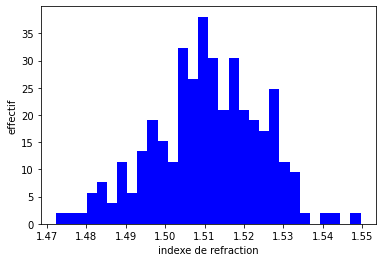

In [158]:
plt.figure()
plt.hist(ech.loc[:,'RI'],bins=30,density=1, color='blue')
plt.xlabel("indexe de refraction")
plt.ylabel("effectif")
plt.show()

### Variable Na, Al, Si

Ces trois variable sont quantitative continue. Elles representent la proportion d'aluminium, sodium et solicon dans le verre

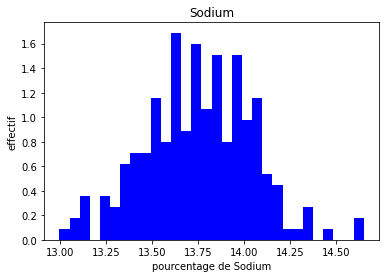

In [159]:
plt.figure()
plt.hist(ech.loc[:,'Na'],bins=30,density=1, color='blue')
plt.xlabel("pourcentage de Sodium")
plt.ylabel("effectif")
plt.title("Sodium")
plt.show()

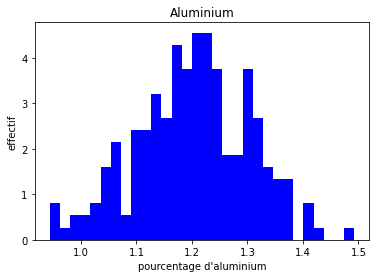

In [160]:
plt.figure()
plt.hist(ech.loc[:,'Al'],bins=30,density=1, color='blue')
plt.xlabel("pourcentage d'aluminium")
plt.ylabel("effectif")
plt.title("Aluminium")
plt.show()

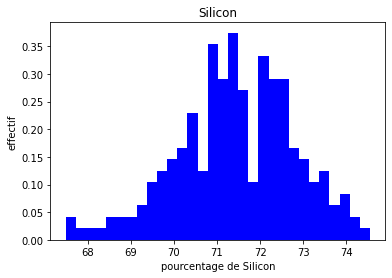

In [161]:
plt.figure()
plt.hist(ech.loc[:,'Si'],bins=30,density=1, color='blue')
plt.xlabel("pourcentage de Silicon")
plt.ylabel("effectif")
plt.title("Silicon")
plt.show()

### Variable type

cette variable est qualitative discrete et reparti les differents verre en different types.

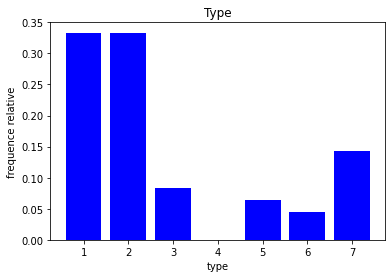

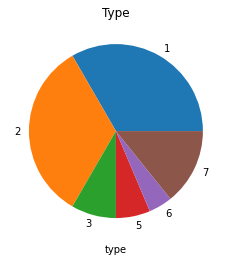

In [162]:
(Valeurs,FreqAbsolues)=np.unique(ech.loc[:,'Type'], return_counts=True)
FreqRelatives=FreqAbsolues/len(ech.values)

plt.figure()
plt.bar(Valeurs, FreqRelatives, color='blue')
plt.xlabel("type")
plt.ylabel("frequence relative")
plt.title("Type")
plt.show()

plt.figure()
plt.pie(FreqRelatives, labels=Valeurs)
plt.xlabel("type")
plt.title("Type")
plt.show()


## 2/

creation de la nouvelle variable Type2

In [163]:
Type2 = []
for elem in ech.loc[:,'Type']:
    if(elem == 1):
        Type2.append(1)
    elif(elem == 2):
        Type2.append(2)
    else:
        Type2.append(3)
ech['Type2'] = Type2

## 3/ analyse des variables